# Algoritmo backpropagation

Se realiza la implementacion del algoritmo backpropagation para que aprenda una red neuronal multicapa.


In [972]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt
%matplotlib inline

In [973]:
class NNetwork():
    
    def __init__(self, inputs, layers):
        self.inputs = inputs     # numero de entradas
        self.layers = layers     # numero de capas
        self.W = [0]*layers      # lista de matrices de pesos
        self.b = [0]*layers      # lista de vectores bias
        self.p = [0]*inputs      # lista de entradas
        self.n = [0]*layers      # lista de las sumas
        self.a = [0]*(layers+1)  # lista de salidas
        self.f = []              # funciones de activacion
        self.s = [0]*layers      # sensibilidades de la red 
        self.e = []              # lista de errores 
        
    def feedForward(self):
        ''' calcula las salidas en cada una de las capas '''
        # a0 = p
        self.a[0] = np.array(self.p)                                        
        for i in range(self.layers):
            # producto matriz-escalar
            if self.a[i].size == 1:
                n = self.W[i]*self.a[i] + self.b[i]
            # producto matriz-vector
            else:
                n = np.matmul(self.W[i], self.a[i]) + self.b[i]
            # an+1 = fn(Wnan+bn) 
            a = self.f[i](n)                                       
            self.n[i] = np.array(n)
            self.a[i+1] = np.array(a)
    
    def error(self, t, a):
        ''' calcula el error '''
        self.e = t-a
    
    def backpropagation(self):
        ''' realiza la retropropagacion '''
        # sensibilidad capa 2
        s2 = -2*1*self.e[0]
        dF = []
        # construir la matriz Jacobiana
        #for i in range(self.layers):
        for i in range(len(self.b[0])):
            dF.append((1-self.a[1][i])*self.a[1][i])
        dF = np.diag(dF)
        # sensibilidad capa 1
        s1 = np.matmul(dF, self.W[1]) * s2
        
        self.s[0] = s1
        self.s[1] = s2
        
    def updateWnB(self, alpha):
        ''' actualizar los pesos y los bias de cada capa'''
        for i in range(self.layers):
            self.W[i] = self.W[i] - alpha*self.s[i]*self.a[i]
            self.b[i] = self.b[i] - alpha*self.s[i]
    
    def learn(self, t, p, alpha, epochs):
        ''' entrenamiento de la red neuronal'''
        for k in range(epochs):
            self.p = p[np.random.randint(0, len(p))]
            self.feedForward()
            self.error(t(self.p), self.a[2])
            self.backpropagation()
            self.updateWnB(alpha)
    
    def predict(self, p):
        ''' predecir los valores de salida'''
        y = []
        for x in p:
            n1 = self.W[0]*x + self.b[0]
            a1 = self.f[0](n1)
            a2 = np.matmul(self.W[1], a1) + self.b[1]
            y.append(a2)
        return y

## Ejercicio 1
Aproximar la funcion continua $1 + sin(\frac{\pi}{4}p)$ para los valores de p en $-2\leq p \leq 2$

Los valores de p a usar en el entrenamiento consisten de 21 muestras de -2 a 2, siendo espaciados cada uno por 0.2 unidades.

In [974]:
# Instanciar red neuronal con 1 entrada y 2 capas
nn = NNetwork(1, 2)

nn.W = [[-0.27, -0.41], [0.09, -0.17]]                      # Matriz de pesos inicial
nn.b = [[-0.48, -0.13], [0.48]]                             # Vector de bias inicial
nn.p = np.array([1])                                        # Valor de p inicial
nn.f = [lambda x: 1/(1+np.power(np.e, -x)), lambda x: x]    # Funciones de activacion

p = np.arange(-2,2.2, 0.2)                                  # Vector p con las 21 muestras

t = lambda x: 1 + np.sin(np.pi/4*x)                         # Funcion objetivo a aproximar

np.vectorize(nn.f)                                          # Vectorizacion de las funciones 
np.vectorize(t)

In [975]:
# Entrenamiento de la red neuronal
nn.learn(t, p, 0.1, 1000)

In [976]:
print('Vector de pesos capa 1:\n')
for w in nn.W[0]:
    print("%.4f" % w)
    
print('\nVector de pesos capa 2:\n')
for w in nn.W[1]:
    print("%.4f" % w)
    
print('\nVector bias capa 1:\n')
print(nn.b[0])
print('\nVector bias capa 2:\n')
print(nn.b[1])

Vector de pesos capa 1:

0.4196
-1.5954

Vector de pesos capa 2:

0.5629
-1.9709

Vector bias capa 1:

[-0.47236817 -0.02587258]

Vector bias capa 2:

[1.76022177]


In [977]:
# Predecir los valores de salida para cada p
y = nn.predict(p)

In [978]:
# Vectores de salida y entrada
y = [x[0] for x in y]
x = [n for n in p]

In [979]:
# Calcular los valores reales
y_real = [t(n) for n in x]

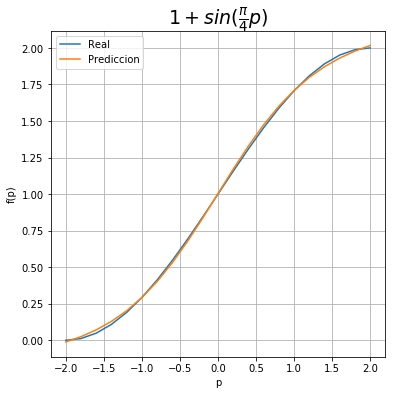

In [980]:
plt.figure(figsize=(6, 6))
plt.plot(x, y_real)
plt.plot(x, y)
plt.title(r"$ 1 + sin(\frac{\pi}{4}p) $",fontsize=19)
plt.xlabel('p')
plt.ylabel('f(p)')
plt.legend(['Real','Prediccion'])
plt.grid(True)
plt.show()

## Ejercicio 2

Aproximar la funcion continua $1 + sin(\frac{\pi}{2}p)$ para los valores de p en $-2\leq p \leq 2$

Los pesos y bias iniciales son inicializados con numeros aleatorios distribuidos uniformemente entre -5 y 5.

La red neuronal debe ser dise;ada para los siguientes casos:

1. S = 2 , $\alpha = 0.5$
2. S = 2 , $\alpha = 1$
3. S = 10 , $\alpha = 0.5$

### 1. Primer red

In [981]:
nn1 = NNetwork(1, 2)
nn1.W = [np.random.rand(2) - 0.5 for i in range(2)]            # Vector de pesos
nn1.b = [np.random.rand(2) - 0.5, np.random.rand(1)-0.5]       # Vector de bias
nn1.f = [lambda x: 1/(1+np.power(np.e, -x)), lambda x: x]      # Funciones de activacion

In [982]:
t1 = lambda x: 1 + np.sin(np.pi/2*x)                            # Funcion objetivo a aproximar

np.vectorize(nn1.f)             
np.vectorize(t1)

In [983]:
nn1.learn(t1, p, 0.5, 10000)

In [984]:
print('Vector de pesos capa 1:\n')
for w in nn1.W[0]:
    print("%.4f" % w)
    
print('\nVector de pesos capa 2:\n')
for w in nn1.W[1]:
    print("%.4f" % w)
    
print('\nVector bias capa 1:\n')
print(nn1.b[0])
print('\nVector bias capa 2:\n')
print(nn1.b[1])

Vector de pesos capa 1:

-4.6638
4.8359

Vector de pesos capa 2:

0.7184
1.9730

Vector bias capa 1:

[-9.69831573 -0.12115362]

Vector bias capa 2:

[0.09830553]


In [985]:
# Predecir los valores de salida para cada p
y1 = nn1.predict(p)

In [986]:
# Vectores de salida y entrada
y1 = [x[0] for x in y1]
x = [n for n in p]

In [987]:
# Calcular los valores reales
y_real_1 = [t1(n) for n in p]

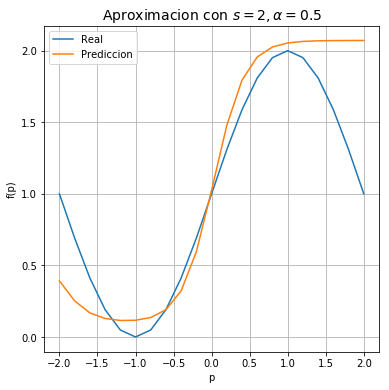

In [988]:
plt.figure(figsize=(6, 6))
plt.plot(x, y_real_1)
plt.plot(x, y1)
plt.title(r"Aproximacion con $s=2 ,\alpha=0.5$",fontsize=14)
plt.xlabel('p')
plt.ylabel('f(p)')
plt.legend(['Real','Prediccion'])
plt.grid(True)
plt.show()

### 2. Segunda red

In [989]:
nn2 = NNetwork(1, 2)
nn2.W = [np.random.rand(2) - 0.5 for i in range(2)]            # Vector de pesos
nn2.b = [np.random.rand(2) - 0.5, np.random.rand(1)-0.5]       # Vector de bias
nn2.f = [lambda x: 1/(1+np.power(np.e, -x)), lambda x: x]      # Funciones de activacion
#nn2.f = [lambda x: 1/(1+np.e**(-x)), lambda x: x]

In [990]:
t2 = lambda x: 1 + np.sin(np.pi/2*x)                     
np.vectorize(t2)

In [991]:
nn2.learn(t2, p, 1, 10000)

In [992]:
print('Vector de pesos capa 1:\n')
for w in nn2.W[0]:
    print("%.4f" % w)
    
print('\nVector de pesos capa 2:\n')
for w in nn2.W[1]:
    print("%.4f" % w)
    
print('\nVector bias capa 1:\n')
print(nn2.b[0])
print('\nVector bias capa 2:\n')
print(nn2.b[1])

Vector de pesos capa 1:

-0.0101
1.1995

Vector de pesos capa 2:

-0.0272
-1.1330

Vector bias capa 1:

[-10.86816589 -13.43909581]

Vector bias capa 2:

[-267.52390965]


In [993]:
# Predecir los valores de salida para cada p
y2 = nn2.predict(p)

In [994]:
# Vectores de salida y entrada
y2 = [x[0] for x in y2]
x = [n for n in p]

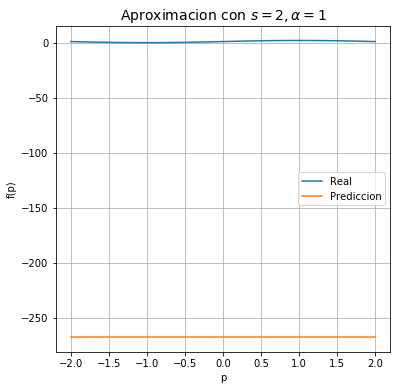

In [995]:
plt.figure(figsize=(6, 6))
plt.plot(x, y_real_1)
plt.plot(x, y2)
plt.title(r"Aproximacion con $s=2 ,\alpha=1$",fontsize=14)
plt.xlabel('p')
plt.ylabel('f(p)')
plt.legend(['Real','Prediccion'])
plt.grid(True)
plt.show()

### 3. Tercer red

In [996]:
nn3 = NNetwork(1, 2)
nn3.W = [np.random.rand(10) - 0.5 for i in range(2)]             # Vector de pesos
nn3.b = [np.random.rand(10) - 0.5, np.random.rand(1)-0.5]        # Vector de bias
nn3.f = [lambda x: 1/(1+np.power(np.e, -x)), lambda x: x]        # Funciones de activacion

In [997]:
np.vectorize(nn3.f)         

In [998]:
nn3.learn(t1, p, 0.5, 100000)

In [999]:
print('Vector de pesos capa 1:\n')
for w in nn3.W[0]:
    print("%.4f" % w)
    
print('\nVector de pesos capa 2:\n')
for w in nn3.W[1]:
    print("%.4f" % w)
    
print('\nVector bias capa 1:\n')
print(nn3.b[0])
print('\nVector bias capa 2:\n')
print(nn3.b[1])

Vector de pesos capa 1:

2.1626
2.7744
-9.5170
0.5036
9.3093
-4.7645
0.5035
-4.6643
-0.7440
0.7434

Vector de pesos capa 2:

-1.1580
-5.7213
8.6207
-7.9208
-1.0807
-1.3852
-1.9703
-15.5871
-2.8031
-1.6659

Vector bias capa 1:

[ -6.8532246  -21.91322341 -40.028321    -6.01084241 -17.53748403
  -0.13674371  -4.61185363 -23.942132   -12.79796623  -5.24145229]

Vector bias capa 2:

[2.05924354]


In [1000]:
# Predecir los valores de salida para cada p
y3 = nn3.predict(p)

In [1001]:
# Vectores de salida y entrada
y3 = [x[0] for x in y3]
x = [n for n in p]

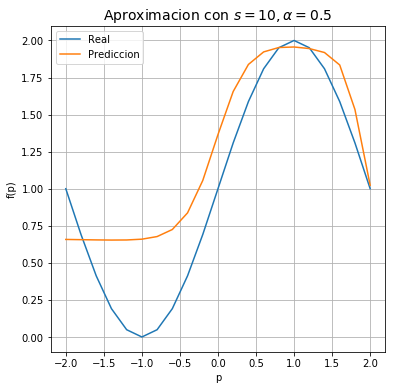

In [1002]:
plt.figure(figsize=(6, 6))
plt.plot(x, y_real_1)
plt.plot(x, y3)
plt.title(r"Aproximacion con $s=10 ,\alpha=0.5$",fontsize=14)
plt.xlabel('p')
plt.ylabel('f(p)')
plt.legend(['Real','Prediccion'])
plt.grid(True)
plt.show()